<a href="https://colab.research.google.com/github/RogerHeederer/NLP_entry/blob/master/ReutersNews.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Reference Source : wikidocs.net 유영준님 자료

스스로 학습하면서 필요한 부분에는 추가적 설명, 소스 코드 삽입 및 수정 등이 있습니다. 영리적 목적이 아닌, 자기 계발 목적으로 정리한 자료입니다.

In [ ]:
from tensorflow.keras.datasets import reuters
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
#데이터 셋 분배. num_words는 빈도 상위 몇번까지 표출할지에 대해 사용
(X_train, y_train), (X_test, y_test) = reuters.load_data(num_words=None, test_split=0.2)

2113536/2110848 [==============================] - 0s 0us/step


In [ ]:
print('훈련용 뉴스 기사 : {}'.format(len(X_train)))
print('테스트용 뉴스 기사 : {}'.format(len(X_test)))
num_classes = max(y_train) + 1
print('카테고리: {}'.format(num_classes))

훈련용 뉴스 기사 : 8982
테스트용 뉴스 기사 : 2246
카테고리: 46


In [ ]:
# 정수 인코딩이 끝난 상태의 데이터를 받아온거임
print(X_train[0])
print(y_train[0])

[1, 27595, 28842, 8, 43, 10, 447, 5, 25, 207, 270, 5, 3095, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 4579, 1005, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 1245, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12]
3


뉴스 기사의 최대 길이:2376
뉴스 기사의 평균 길이:145.5398574927633


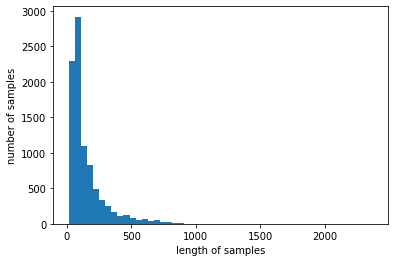

In [ ]:
print('뉴스 기사의 최대 길이:{}'.format(max(len(l) for l in X_train)))
print('뉴스 기사의 평균 길이:{}'.format( sum(map(len, X_train))/len(X_train) ))

plt.hist([len(s) for s in X_train], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

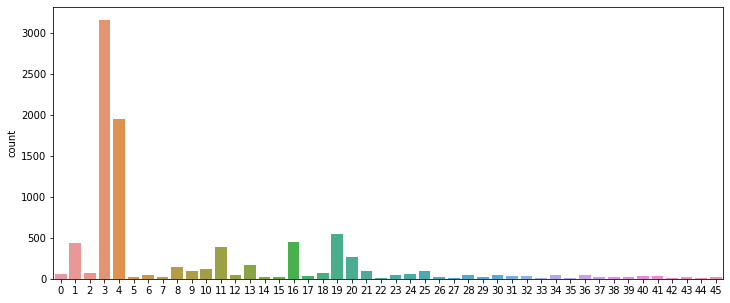

In [ ]:
fig, axe = plt.subplots(ncols=1)
fig.set_size_inches(12, 5)
sns.countplot(y_train)

In [ ]:
unique_elements, counts_elements = np.unique(y_train, return_counts=True)
print("각 레이블에 대한 빈도수: ")
print(np.asarray((unique_elements, counts_elements)))

각 레이블에 대한 빈도수: 
[[   0    1    2    3    4    5    6    7    8    9   10   11   12   13
    14   15   16   17   18   19   20   21   22   23   24   25   26   27
    28   29   30   31   32   33   34   35   36   37   38   39   40   41
    42   43   44   45]
 [  55  432   74 3159 1949   17   48   16  139  101  124  390   49  172
    26   20  444   39   66  549  269  100   15   41   62   92   24   15
    48   19   45   39   32   11   50   10   49   19   19   24   36   30
    13   21   12   18]]


In [ ]:
word_to_index = reuters.get_word_index() # 각 단어와 그에 부여된 인덱스 리턴
word_to_index['cooking']

8805

In [ ]:
#좀 더 쉽게 보기
index_to_word = {}
for key, value in word_to_index.items():
  index_to_word[value] = key

In [ ]:
print("빈도수 상위 28842번 단어 : {}".format(index_to_word[28842]))
print("빈도수 상위 1번 단어 : {}".format(index_to_word[1]))

빈도수 상위 28842번 단어 : nondiscriminatory
빈도수 상위 1번 단어 : the


In [ ]:
#X_train[0] 문장이 어떤 단어로 구성되어 있는지 복원해보기
for index, token in enumerate(("<pad>", "<sos>", "<unk>")):
  index_to_word[index]=token

print(index_to_word[0], index_to_word[1], index_to_word[2], '\n')
print(X_train[0], '\n')
print(' '.join([index_to_word[index] for index in X_train[0]]))

<pad> <sos> <unk> 

[1, 27595, 28842, 8, 43, 10, 447, 5, 25, 207, 270, 5, 3095, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 4579, 1005, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 1245, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12] 

<sos> wattie nondiscriminatory mln loss for plc said at only ended said commonwealth could 1 traders now april 0 a after said from 1985 and from foreign 000 april 0 prices its account year a but in this mln home an states earlier and rise and revs vs 000 its 16 vs 000 a but 3 psbr oils several and shareholders and dividend vs 000 its all 4 vs 000 1 mln agreed largely april 0 are 2 states will billion total and against 000 pct dlrs


**LSTM으로 로이터 뉴스 분류하기**

In [ ]:
from tensorflow.keras.datasets import reuters
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.models import load_model

In [ ]:
#학습에서는 상위 빈도 1000번째 까지 단어들만 자르고, 분배 비율은 0.2
(X_train, y_train), (X_test, y_test) = reuters.load_data(num_words=1000, test_split=0.2)

In [ ]:
#뉴스 기사마다 단어의 수가 다르기 때문에, 모델의 입력으로 사용하기 위해서는 모든 뉴스 기사의 길이 동일하게 맞춤
max_len = 100
X_train = pad_sequences(X_train, maxlen=max_len) #훈련용 뉴스 기사 패딩
X_test = pad_sequences(X_test, maxlen=max_len)#테스트용 뉴스 기사 패딩

In [ ]:
#레이블에 대해선 원-핫 인코딩하기
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [ ]:
model = Sequential()
model.add(Embedding(1000, 120)) # 1000개의 단어, 임베딩 벡터 120 차원
model.add(LSTM(120)) #히든사이즈 크기
model.add(Dense(46, activation='softmax'))

In [ ]:
#val_loss가 증가하먄 과적합 -> 조기종료
es = EarlyStopping(monitor='val_loss', mode = 'min', verbose=1, patience=4)
mc = ModelCheckpoint('best_model.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])

In [ ]:
history = model.fit(X_train, y_train, batch_size=128, epochs=30, callbacks=[es, mc], validation_data=(X_test, y_test))

Epoch 1/30
69/71 [============================>.] - ETA: 0s - loss: 2.6107 - acc: 0.3359
Epoch 00001: val_acc improved from -inf to 0.36198, saving model to best_model.h5
71/71 [==============================] - 2s 22ms/step - loss: 2.6060 - acc: 0.3369 - val_loss: 2.3630 - val_acc: 0.3620
Epoch 2/30
70/71 [============================>.] - ETA: 0s - loss: 2.0801 - acc: 0.4602
Epoch 00002: val_acc improved from 0.36198 to 0.49555, saving model to best_model.h5
71/71 [==============================] - 1s 15ms/step - loss: 2.0803 - acc: 0.4603 - val_loss: 1.9434 - val_acc: 0.4955
Epoch 3/30
70/71 [============================>.] - ETA: 0s - loss: 2.0718 - acc: 0.4665
Epoch 00003: val_acc improved from 0.49555 to 0.50000, saving model to best_model.h5
71/71 [==============================] - 1s 15ms/step - loss: 2.0702 - acc: 0.4669 - val_loss: 1.9054 - val_acc: 0.5000
Epoch 4/30
68/71 [===========================>..] - ETA: 0s - loss: 1.8260 - acc: 0.5339
Epoch 00004: val_acc improved fr

In [ ]:
loaded_model = load_model('best_model.h5')
print("\n 테스트 정확도: %.4f" % (loaded_model.evaluate(X_test, y_test)[1]))

71/71 [==============================] - 0s 6ms/step - loss: 1.2598 - acc: 0.7061

 테스트 정확도: 0.7061


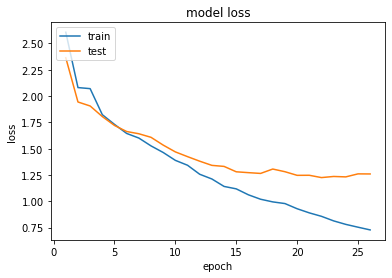

In [ ]:
epochs = range(1, len(history.history['acc']) + 1)
plt.plot(epochs, history.history['loss'])
plt.plot(epochs, history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()